<a href="https://colab.research.google.com/github/maksudrakib44/Machine-Learning-Python/blob/main/Lab_4__Logistic_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Theory Recap

- For linear regression (a best fitting line), the Estimation:
$\hat{y} = wx+b$
- For logistic regression (probability distribution), the Sigmoid:
$s(x) = \frac{1}{1+e^{-x}}$

- So the prediction will be:
$\hat{y} = h_\theta(x) = \frac{1}{1+e^{-wx+b}} $


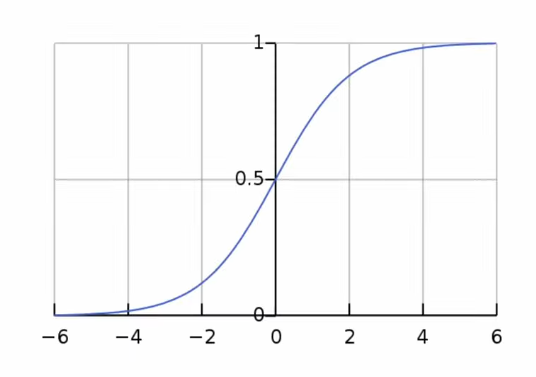

- Error (cross entropy):
$ J(w,b) = J(\theta) = \frac{1}{N} \sum_{i=1}^{n}{[y^i log(h_\theta(x^i)) + (i-y^i)log(1-h_\theta(x^i))] } $

- The gradient will be:
$
J^{'}(\theta) =
\begin{bmatrix}
\frac{dJ}{dw} \\
\frac{dJ}{db}
\end{bmatrix}
= [...] =
\begin{bmatrix}
\frac{1}{N} \sum2x_i (\hat{y} - y_i) \\
\frac{1}{N} \sum2 (\hat{y} - y_i)
\end{bmatrix}
$



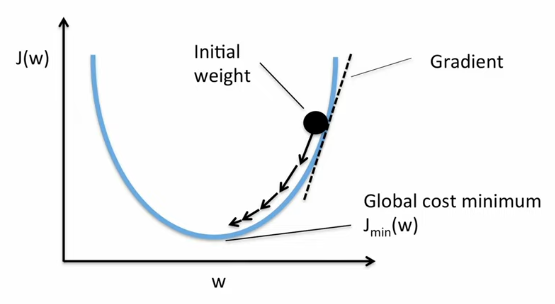

- Gradient Descent function will be updated by:
$w = w - \alpha . dw \\ b = b - \alpha . db$

Here, $\alpha$ = learning rate

### Training Steps:
- Initialize weights as zero
- Initialize bias as zero
- For data X, predict $\hat{y} = \frac{1}{1+e^{-wx+b}} $, calculate error, update weights and bias by gradient descent, repeat n times

### Testing Steps:
- Put test data into $\hat{y} = h_\theta(x) = \frac{1}{1+e^{-wx+b}} $
- Choose label based on probability [0 ~ 0.5 and 0.5 ~ 1]

# 2. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

# 3. Building Logictic Regression Model

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))



class LogisticRegression:
  def __init__(self, lr=0.001, n_iter=1000):
    self.lr = lr
    self.n_iter = n_iter
    self.weights =  None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iter):
      linear_predictions = np.dot(X, self.weights) + self.bias
      predictions = sigmoid(linear_predictions)

      dw = (1/n_samples) * np.dot(X.T, (predictions - y))
      db = (1/n_samples) * np.sum(predictions - y)

      self.weights = self.weights - (self.lr * dw)
      self.bias = self.bias - (self.lr * db)


  def predict(self, X):
    linear_predictions = np.dot(X, self.weights) + self.bias
    y_predictions = sigmoid(linear_predictions)

    class_predictions = [0 if y<=0.5 else 1 for y in y_predictions]

    # result = [0]*y_predictions
    # for y in y_predictions:
    #   if y<=0.5:
    #     result = 0
    #   else:
    #     result = 1


    return class_predictions

# 4. Training and Testing on Breast Cancer dataset

In [ ]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def accuracy(y_pred, y_test):
  return np.sum(y_pred == y_test)/len(y_test)

/tmp/ipython-input-2-2866372427.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [ ]:
result = accuracy(y_pred, y_test)
print("Accuracy: ", result)

Accuracy:  0.9473684210526315
